In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For predictions based on color

In [106]:
roc = np.load(open("roc_histograms_of_palette.npy","rb"))

In [107]:
pd.read_csv("confusion_histograms_of_palette.csv", index_col=0).round(2)

,False positive,False negative,True positive,True negative
is_violet,0.73,3.91,4.22,91.14
has_rost_body,8.79,17.34,29.78,44.09
has_rost_head,2.69,11.01,4.60,81.70


In [189]:
stats_color_based = pd.read_csv("confusion_histograms_of_palette_bias.csv", index_col=0).round(1)
stats_color_based["Accuracy"]= stats_color_based[["True positive","True negative"]].sum(axis=1)
stats_color_based

,False positive,False negative,True positive,True negative,Accuracy
is_violet,1.6,3.3,4.8,90.3,95.1
has_rost_body,21.4,7.8,39.3,31.5,70.8
has_rost_head,8.6,6.8,8.9,75.8,84.7


In [109]:
roc_violet = roc[:,:,0]
roc_rost_body = roc[:,:,1]
roc_rost_head = roc[:,:,2]

In [110]:
roc_rost_body.sort()
roc_violet.sort()
roc_rost_head.sort()

In [111]:
roc_violet = list(roc_violet)
roc_violet[0] = list(roc_violet[0])
roc_violet[1] = list(roc_violet[1])
roc_violet[0].append(1)
roc_violet[1].append(1)
roc_violet[0] = np.array(roc_violet[0])
roc_violet[1] = np.array(roc_violet[1])

In [112]:
roc_rost_body = list(roc_rost_body)
roc_rost_body[0] = list(roc_rost_body[0])
roc_rost_body[1] = list(roc_rost_body[1])
roc_rost_body[0].append(1)
roc_rost_body[1].append(1)
roc_rost_body[0] = np.array(roc_rost_body[0])
roc_rost_body[1] = np.array(roc_rost_body[1])

In [113]:
roc_rost_head = list(roc_rost_head)
roc_rost_head[0] = list(roc_rost_head[0])
roc_rost_head[1] = list(roc_rost_head[1])
roc_rost_head[0].append(1)
roc_rost_head[1].append(1)
roc_rost_head[0] = np.array(roc_rost_head[0])
roc_rost_head[1] = np.array(roc_rost_head[1])

Text(0.5, 1.0, 'Receiver operating characteristic (ROC)')

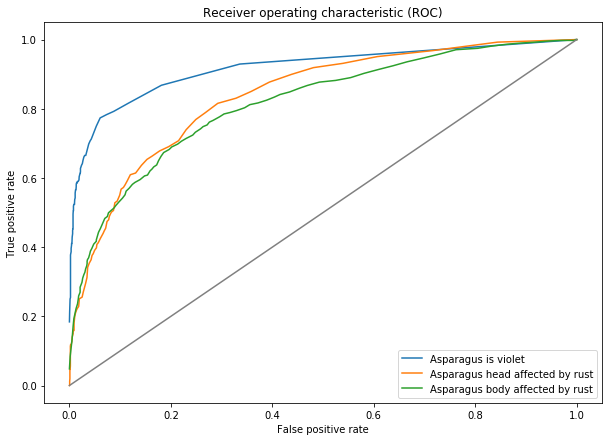

In [44]:
fig, ax = plt.subplots(1,figsize=(10,7))
ax.plot(*roc_violet, label="Asparagus is violet")
ax.plot(*roc_rost_head, label="Asparagus head affected by rust")
ax.plot(*roc_rost_body, label="Asparagus body affected by rust")
ax.plot([0,1],color = "gray")
ax.legend()


ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Receiver operating characteristic (ROC)')

In [65]:
def prepare_roc(roc_feature):
    roc_feature.sort()
    roc_feature = list(roc_feature)
    roc_feature[0] = list(roc_feature[0])
    roc_feature[1] = list(roc_feature[1])
    #roc_feature[0].append(1)
    #roc_feature[1].append(1)
    roc_feature[0] = np.array(roc_feature[0])
    roc_feature[1] = np.array(roc_feature[1])
    return roc_feature

# For simple CNN

In [187]:
roc = np.load(open("roc_simple_cnn.npy","rb"))

In [188]:
pd.read_csv("confusion_matrix_simple_cnn.csv", index_col=0).round(2)

,False positive,False negative,True positive,True negative
is_bended,7.87,16.35,24.83,50.96
is_violet,1.61,5.45,2.69,90.25
short,0.19,0.19,2.03,97.58
thick,0.81,1.80,4.80,92.59
thin,2.72,1.23,28.47,67.57


In [175]:
stats_simple_cnn = pd.read_csv("confusion_matrix_simple_cnn_single_perspective.csv", index_col=0).round(2)

In [176]:
stats_simple_cnn["Accuracy"]= stats_simple_cnn[["True positive","True negative"]].sum(axis=1)

In [177]:
stats_simple_cnn

,False positive,False negative,True positive,True negative,Accuracy
is_bended,23.37,11.20,29.97,35.46,65.43
is_violet,4.26,3.49,4.64,87.61,92.25
short,0.27,0.61,1.61,97.51,99.12
thick,2.26,2.15,4.45,91.14,95.59
thin,5.56,2.46,27.24,64.74,91.98


In [178]:
roc_bended_cnn = prepare_roc(roc[:,:,0])
roc_violet_cnn = prepare_roc(roc[:,:,1])
roc_short_cnn = prepare_roc(roc[:,:,2])
roc_thick_cnn = prepare_roc(roc[:,:,2])
roc_thin_cnn = prepare_roc(roc[:,:,2])

Text(0.5, 1.0, 'Receiver operating characteristic (ROC)')

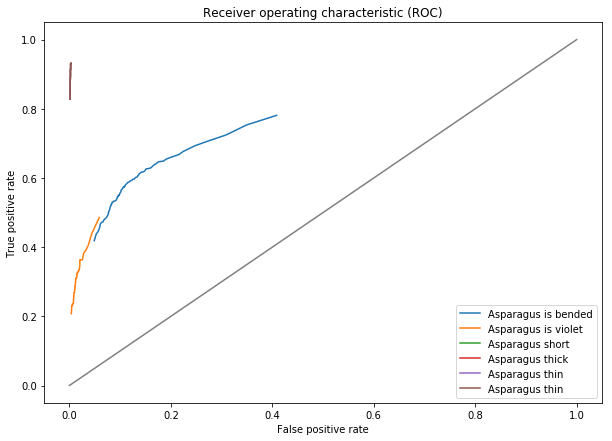

In [179]:
fig, ax = plt.subplots(1,figsize=(10,7))
ax.plot(*roc_bended_cnn, label="Asparagus is bended")
ax.plot(*roc_violet_cnn, label="Asparagus is violet")
ax.plot(*roc_short_cnn, label="Asparagus short")
ax.plot(*roc_thick_cnn, label="Asparagus thick")
ax.plot(*roc_thin_cnn, label="Asparagus thin")

ax.plot(*roc_thin_cnn, label="Asparagus thin")

ax.plot([0,1],color = "gray")
ax.legend()


ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Receiver operating characteristic (ROC)')

# For angle based predictions

In [180]:
stats_angle_based = pd.read_csv("confusion_matrix_angles.csv", index_col=0).round(2)
stats_angle_based["Accuracy"]= stats_angle_based[["True positives","True negatives"]].sum(axis=1)
stats_angle_based

,False positive,False negatives,True positives,True negatives,Accuracy
is_bended,6.29,16.16,25.02,52.53,77.55


In [181]:
angles = np.load("roc_angles.npy")

In [182]:
roc_bended_angles = prepare_roc(angles[:,:,0])

Text(0.5, 1.0, 'Receiver operating characteristic (ROC)')

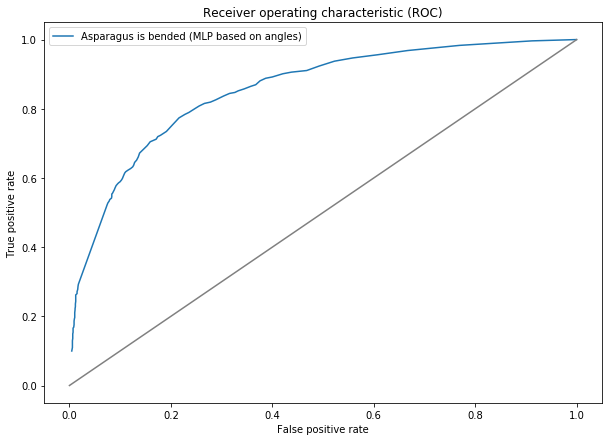

In [183]:
fig, ax = plt.subplots(1,figsize=(10,7))
ax.plot(*roc_bended_angles, label="Asparagus is bended (MLP based on angles)")

ax.plot([0,1],color = "gray")
ax.legend()


ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Receiver operating characteristic (ROC)')

# Comparison of approaches

Text(0.5, 1.0, 'Receiver operating characteristic (ROC)')

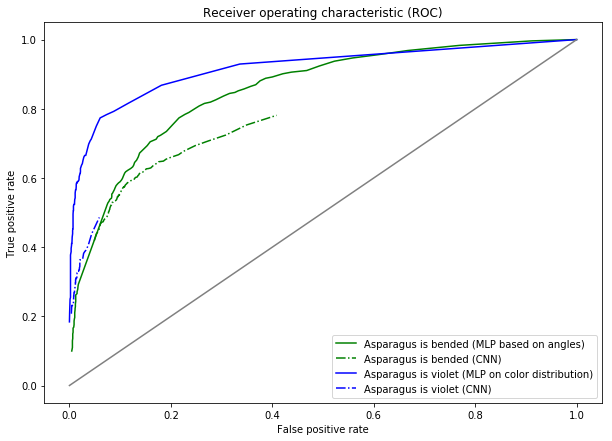

In [186]:
fig, ax = plt.subplots(1,figsize=(10,7))
ax.plot(*roc_bended_angles, '-', label="Asparagus is bended (MLP based on angles)", color = "green")
ax.plot(*roc_bended_cnn,'-.', label="Asparagus is bended (CNN)", color = "green")


ax.plot(*roc_violet, '-', label="Asparagus is violet (MLP on color distribution)", color="blue")
ax.plot(*roc_violet_cnn, '-.', label="Asparagus is violet (CNN)", color = "blue")

ax.plot([0,1],color = "gray")
ax.legend()


ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Receiver operating characteristic (ROC)')

### Comparison of accuracies

Bended: 65.43% [Simple CNN] **vs.** 77.55% [MLP on angles] 


Violet: 92.25% [Simple CNN] **vs.** 95.1% [Color based]
